# 퍼셉트론 (Perceptron)
- 퍼셉트론은 논리 게이트를 모방할 수 있는 인공 신경망의 한 종류이다. 
- 가중치와 편향을 통해 논리 게이트와 같은 동작을 한다. 

In [21]:
import numpy as np

In [22]:
class Perceptron : 
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def activate(self, x):
        return 1 if np.dot(self.weights, x) + self.bias > 0 else 0   # 점곱 계산.  점곱에 편향을 더한값이 0보다 크면 1, 아니면 0 반환

In [ ]:
class Perceptron:
    def __init__(self, weights, bias):
        self.weights = weights
        self.bias = bias

    def activate(self, x):
        return 1 if np.dot(self.weights, x) + self.bias > 0 else 0      # 계단함수

In [23]:
test_case = [(0, 0), (0, 1), (1, 0), (1, 1)]

In [43]:
AND_gate = Perceptron(weights=[0.5, 0.5], bias= -0.7)

for test in test_case:
    print(f'input : {test} | output : {AND_gate.activate(test)}')

input : (0, 0) | output : 0
input : (0, 1) | output : 0
input : (1, 0) | output : 0
input : (1, 1) | output : 1


In [44]:
OR_gate = Perceptron(weights=[0.5, 0.5], bias= -0.2)

for test in test_case:
    print(f'input : {test} | output : {OR_gate.activate(test)}')

input : (0, 0) | output : 0
input : (0, 1) | output : 1
input : (1, 0) | output : 1
input : (1, 1) | output : 1


In [ ]:
NAND_gate = Perceptron(weights=[-0.5, -0.5], bias = 0.7)

for test in test_case:
    print(f'input : {test} | output : {NAND_gate.activate(test)}')

input : (0, 0) | output : 1
input : (0, 1) | output : 1
input : (1, 0) | output : 1
input : (1, 1) | output : 0


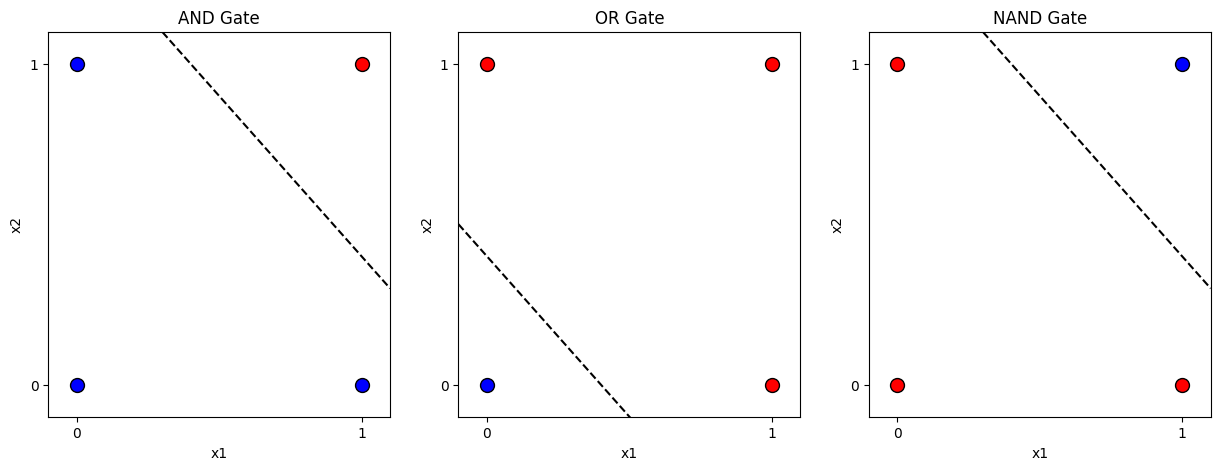

In [45]:
# 시각화
import matplotlib.pyplot as plt

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
gates = {
    'AND' : AND_gate, 
    'OR' : OR_gate, 
    'NAND' : NAND_gate
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for idx,(gate_name, perceptron) in enumerate(gates.items()) :
    ax = axes[idx]
    outputs = np.array([perceptron.activate(x) for x in inputs])

    for (x1, x2), y in zip(inputs, outputs) :
        ax.scatter(x1, x2, c='red' if y == 1  else 'blue', s=100, edgecolor = 'black')

    x_vals = np.linspace(-0.1, 1.1, 100)
    y_vals = (-perceptron.weights[0]*x_vals - perceptron.bias) / perceptron.weights[1]
    ax.plot(x_vals, y_vals, 'k--')

    ax.set_xlim(-0.1, 1.1)
    ax.set_ylim(-0.1, 1.1)
    ax.set_xticks([0, 1])
    ax.set_yticks([0, 1])
    ax.set_title(f'{gate_name} Gate')
    ax.set_xlabel('x1')
    ax.set_ylabel('x2')

# XOR Gate

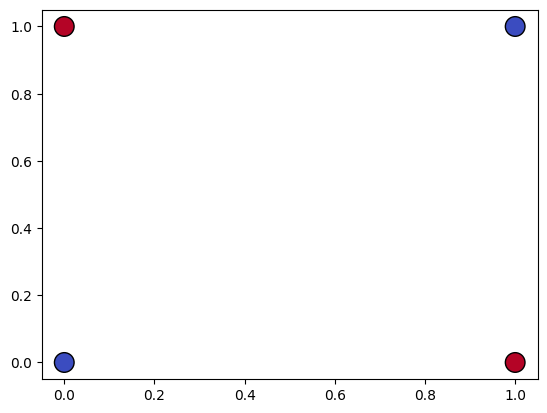

In [42]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

plt.Figure(figsize=(4, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, s=200, edgecolors = 'black', cmap='coolwarm')
plt.show()

### 다층 퍼셉트론 (Multi-Layer Perceptron, MLP)


In [47]:
def XOR_gate(x1, x2) : 
    or_out = OR_gate.activate([x1, x2])
    nand_out = NAND_gate.activate([x1, x2])
    return AND_gate.activate([or_out, nand_out])


In [49]:
for test in test_case:
    print(f'input : {test} | output : {XOR_gate(test[0], test[1])}')

input : (0, 0) | output : 0
input : (0, 1) | output : 1
input : (1, 0) | output : 1
input : (1, 1) | output : 0


In [52]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

In [54]:
# 다층 퍼셉트론 함수 
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(4, 4),      # 은닉층 크기 : 두 개의 층을 가지는데 각각 4개의 노드를 가짐
    activation='relu',              # 활성화 함수
    solver = 'adam',                # 가중치 업데이트 방식 (최적화 알고리즘)
    max_iter=1000,                  # 모델의 학습 반복 횟수 (epoch)
    random_state=42                 # 가중치 초기화 값 고정
)

mlp.fit(X, y)
pred = mlp.predict(X)

for i in range(4) :     # 예측값이 4개가 나왔기 때문에 각각 뭐가 나왔는지 출력
    print(f'XOR({X[i][0]}, {X[i][1]}) = {pred[i]}')

XOR(0, 0) = 0
XOR(0, 1) = 1
XOR(1, 0) = 1
XOR(1, 1) = 0


c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
hidden_layers = [(1, ), (2, ), (4, ), (8, )]

for config in hidden_layers :
    mlp = MLPClassifier(
        hidden_layer_sizes=config,      # 은닉층 크기 : 두 개의 층을 가지는데 각각 4개의 노드를 가짐
        activation='relu',              # 활성화 함수
        solver = 'adam',                # 가중치 업데이트 방식 (최적화 알고리즘)
        max_iter=1000,                  # 모델의 학습 반복 횟수 (epoch)
        random_state=42                 # 가중치 초기화 값 고정
    )

    mlp.fit(X, y)
    pred = mlp.predict(X)

    print(f'은닉층 구조 {config} -> XOR 예측 결과 : {pred}')   # 노드가 1, 2, 4 개 일때 제대로 예측을 못함. : 은닉층을 구성하는 층, 노드의 계수가 학습에 영향을 줌. 
                                                            # 은닉층의 크기만 학습결과에 영향을 주진 않지만, 학습결과에 많은 영향을 줌 

은닉층 구조 (1,) -> XOR 예측 결과 : [0 1 0 1]
은닉층 구조 (2,) -> XOR 예측 결과 : [1 1 1 1]
은닉층 구조 (4,) -> XOR 예측 결과 : [0 0 0 0]
은닉층 구조 (8,) -> XOR 예측 결과 : [0 1 1 0]


c:\Users\Playdata\anaconda3\envs\ml_env\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
